In [6]:
pip install opencv-python 


     -------------------------------------- 38.2/38.2 MB 889.5 kB/s eta 0:00:00


In [7]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

Give the file path of the image : C:\Users\Lenovo\Desktop\shopping.jpeg


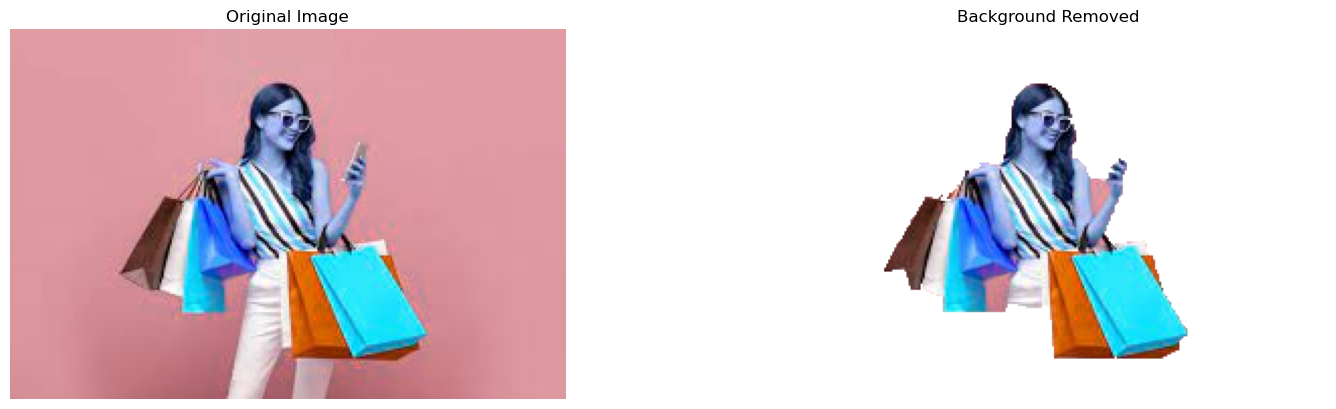

In [15]:
PATH= cv2.imread(input("Give the file path of the image : "))
background(PATH)

In [14]:
def background(PATH):

    height, width = PATH.shape[:2]
    imgo = cv2.resize(PATH, (int(width*0.7),int(height*0.7)), interpolation = cv2.INTER_AREA) 
    imgo=cv2.cvtColor(PATH, cv2.COLOR_BGR2RGB)
    #Create a mask holder
    mask = np.zeros(PATH.shape[:2],np.uint8)
    
    #Grab Cut the object
    bgdModel = np.zeros((1,65),np.float64)
    fgdModel = np.zeros((1,65),np.float64)
    
    #Hard Coding the Rect… The object must lie within this rect.
    rect = (10,10,width-30,height-30)
    cv2.grabCut(PATH,mask,rect,bgdModel,fgdModel,5,cv2.GC_INIT_WITH_RECT)
    mask = np.where((mask==2)|(mask==0),0,1).astype('uint8')
    img1 = PATH*mask[:,:,np.newaxis]

    #Get the background
    background = PATH - img1
    #Change all pixels in the background that are not black to white
    background[np.where((background > [0,0,0]).all(axis = 2))] = [255,255,255]
    
    #Add the background and the image
    final = background + img1
    
    #To be done – Smoothening the edges….
    fig = plt.figure()
    fig.set_figwidth(18)
    a=fig.add_subplot(1, 2, 1)
    a.set_title('Original Image')
    plt.imshow(PATH)
    plt.axis('off')
    a=fig.add_subplot(1, 2, 2)
    a.set_title('Background Removed')
    plt.imshow(final)
    plt.axis('off')